In [1]:
import sunpy

In [134]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
import sunpy
from sunpy.net import hek
from sunpy.net import hek2vso
import shapely
from shapely.wkt import dumps, loads
import os
import datetime
import pickle
from datetime import timedelta
from __future__ import division

In [90]:
def SetupSunPlot():
    plt.grid(True)
    plt.ylabel('ycoord (arcsec)',fontsize=24)
    plt.xlabel('xcoord (arcsec)',fontsize=24)
    plt.axis([-1500, 1500, -1500, 1500])
    Circle1 = plt.Circle((0,0), radius=1000, linestyle='solid', linewidth=2, fill=False)
    fig1 = plt.gcf()
    fig1.gca().add_artist(Circle1)
    ax = fig1.add_subplot(111)
    ax.set_aspect('equal')
    ax.tick_params(axis='both', which='major', labelsize=18)
    fig1.set_size_inches(10.5,10.5)

In [91]:
def PlotPolygon(polygon,color):
    polygon1=plt.Polygon(loads(polygon).exterior,color=color,linewidth=1,fill=None)
    fig1 = plt.gcf()
    fig1.gca().add_artist(polygon1)

In [92]:
def SetupColorMap(ColorMapName,min,max):
    #set up color table
    cm = plt.get_cmap(ColorMapName) 
    cNorm  = colors.Normalize(vmin=min, vmax=max)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    return scalarMap

In [93]:
#variables and files
tstart = '2012/01/01 00:00:00'
tend = '2012/12/31 23:59:59'
DateStr = '2012'
FilamentTracksFile = '/storage/kreeves/Projects/REU/reu2015/FIDustinTracked24Mo.txt'

#tstart = '2012/01/01 00:00:00'
#tend = '2012/12/31 23:59:59'
#DateStr = '2012'
#FilamentTracksFile = '/storage/kreeves/Projects/REU/reu2015/FIDustinTracked_2012.txt'
DateFile = DateStr.replace("/","_")

In [153]:
#Read text file with tracked filament data from Dustin.  Delimiter is a tab (\t).
fi_tracked = pd.read_csv(FilamentTracksFile,delimiter='\t')
track_no_series = fi_tracked['Track No.']
track_no = track_no_series.values
date_series = fi_tracked['HEK_time']
date = date_series.values

In [95]:
#print first few lines of tracked filament data
fi_tracked.head()

,Track No.,HEK_time,next_time,Type,HPC_Center,HPC_BB_Rec,HPC_BB_Poly,HGS_Center,HGS_BB_Rec,HPC_BB_Poly.1,frm_specificid,fi_length,fi_lengthunit,fi_tilt,fi_barbstot,fi_barbsr,fi_barbsl,fi_chirality
0,1,2012-01-01 08:15:04,2012-01-02 08:04:55,FI,POINT(-609.697998 472.868011),"POLYGON((-656.984985 436.648254,-542.289001 43...","POLYGON((-564.419983 446.709991,-561.409973 44...",POINT(-44.2945633 26.7950439),"POLYGON((-47.5955811 24.5251293,-37.3977356 24...","POLYGON((-39.4872627 24.8781204,-39.2833519 25...",NaN,8825558000,cm,-39.23100,2,1,0,0
1,1,2012-01-02 08:04:55,2012-01-04 08:49:18,FI,POINT(-430.617004 476.89801),"POLYGON((-465.830963 446.714844,-395.403046 44...","POLYGON((-435.649994 456.779999,-433.630005 45...",POINT(-29.4385796 26.4697876),"POLYGON((-31.5435486 24.5241413,-26.3244686 24...","POLYGON((-29.4467125 25.1279526,-29.313242 25....",NaN,4161648380,cm,-25.61260,1,1,0,-1
2,1,2012-01-04 08:49:18,2012-01-04 18:11:55,FI,POINT(37.2266006 472.877991),"POLYGON((1.00610006 447.725403,74.4531021 447....","POLYGON((24.1499996 457.790009,27.1700001 458....",POINT(2.41451764 25.5395699),"POLYGON((0.0643619969 23.8671932,4.76890993 23...","POLYGON((1.55323696 24.5332775,1.74846399 24.5...",NaN,3874638850,cm,2.48610,1,0,1,0
3,1,2012-01-04 18:11:55,NaN,FI,POINT(98.6000977 472.877991),"POLYGON((37.2260017 450.743713,163.998001 450....","POLYGON((97.5899963 460.799988,100.610001 460....",POINT(6.40544796 25.5143909),"POLYGON((2.38502502 24.0246315,10.5694752 24.0...","POLYGON((6.2975421 24.7087746,6.49333382 24.71...",NaN,7964536800,cm,1.15586,3,1,0,0
4,2,2012-01-01 08:15:04,2012-01-02 08:04:55,FI,POINT(-148.903 602.656006),"POLYGON((-176.067795 563.417969,-121.738197 56...","POLYGON((-135.820007 573.47998,-132.809998 574...",POINT(-10.7120056 35.0712204),"POLYGON((-12.2748547 32.2228241,-8.44894981 32...","POLYGON((-9.513381 32.9179916,-9.30815029 32.9...",NaN,4807425000,cm,-65.39500,1,0,1,1


In [96]:
#print last few lines of tracked filament data
fi_tracked.tail()

,Track No.,HEK_time,next_time,Type,HPC_Center,HPC_BB_Rec,HPC_BB_Poly,HGS_Center,HGS_BB_Rec,HPC_BB_Poly.1,frm_specificid,fi_length,fi_lengthunit,fi_tilt,fi_barbstot,fi_barbsr,fi_barbsl,fi_chirality
15255,6611,2013-12-28 07:58:56,NaN,FI,POINT(-527.155029 -236.414993),"POLYGON((-554.317627 -268.607635,-497.980408 -...","POLYGON((-543.25 -258.549988,-541.23999 -255.5...",POINT(-34.0934219 -16.1065083),"POLYGON((-36.5489006 -17.9970989,-32.3572197 -...","POLYGON((-35.5688667 -17.410181,-35.3773689 -1...",NaN,3874638850,cm,50.02280,1,1,0,0
15256,6612,2013-12-28 07:58:56,NaN,FI,POINT(-254.522995 -299.794006),"POLYGON((-291.745758 -313.878296,-217.300247 -...","POLYGON((-244.460007 -303.820007,-241.440002 -...",POINT(-16.0862083 -20.2924156),"POLYGON((-18.6258831 -21.1282921,-13.765975 -2...","POLYGON((-15.4601288 -20.5473957,-15.2582588 -...",NaN,3946389500,cm,-3.67465,0,0,0,0
15257,6613,2013-12-28 07:58:56,NaN,FI,POINT(-532.184998 -520.112976),"POLYGON((-547.275574 -582.486023,-488.926392 -...","POLYGON((-535.200012 -572.429993,-532.179993 -...",POINT(-41.0613594 -34.0746727),"POLYGON((-45.5636024 -38.3830948,-39.7302246 -...","POLYGON((-43.7685051 -37.703167,-43.3601875 -3...",NaN,7605748700,cm,67.99910,2,0,2,1
15258,6614,2013-12-28 07:58:56,NaN,FI,POINT(48.2890015 -729.36499),"POLYGON((30.1805992 -760.551636,69.4153976 -76...","POLYGON((53.3199997 -750.48999,56.3400002 -747...",POINT(4.47698784 -50.7717094),"POLYGON((2.98139405 -53.6082458,6.86854076 -53...","POLYGON((5.15777206 -52.6698227,5.41626883 -52...",NaN,3157111550,cm,-87.03250,1,0,1,0
15259,6615,2013-12-28 07:58:56,NaN,FI,POINT(-407.437988 420.516998),"POLYGON((-431.58255 394.360413,-376.251465 394...","POLYGON((-406.429993 404.420013,-403.410004 40...",POINT(-26.9193211 23.1599464),"POLYGON((-28.2879829 21.5043316,-24.3844509 21...","POLYGON((-26.6262932 22.1135349,-26.4383831 22...",NaN,3515878910,cm,-41.88980,1,1,0,-1


2012-01-06 18:05:45
2012-01-07 09:33:12
2012-01-08 08:28:28
2012-01-09 11:08:54
2012-01-09 18:28:35
2012-01-10 11:15:10
2012-01-10 18:23:00
2012-01-11 11:28:18
2012-01-12 08:24:05
2012-01-12 18:29:14
2012-01-13 08:05:59
2012-01-13 18:23:37
2012-01-14 08:16:28
2012-01-15 09:44:48


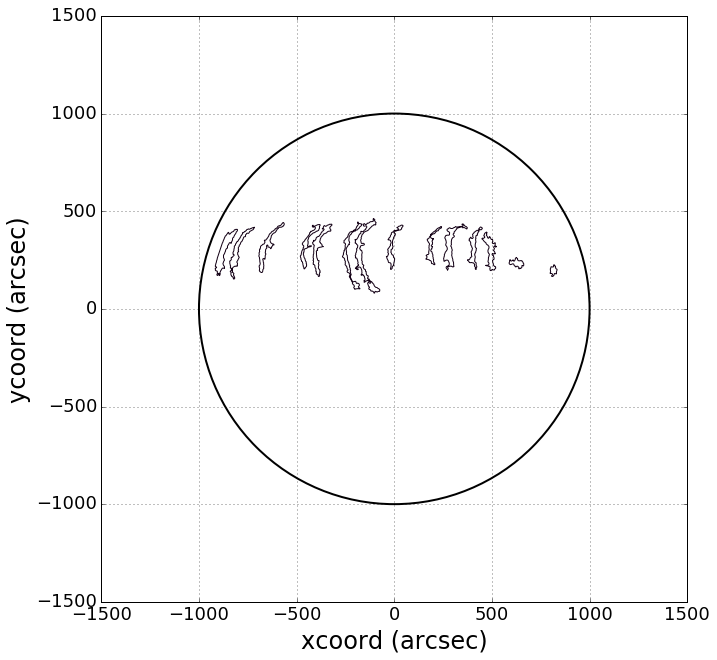

In [97]:
#plot all filament tracks
#set up plot axes and draw a circle
SetupSunPlot()
fig1 = plt.gcf()

#set up color table
scalarMap = SetupColorMap('nipy_spectral',0,track_no[-1])
#need an iterator
i=0
#loop through polygons
FI_track_polys = fi_tracked['HPC_BB_Poly']
for FI_track_no in track_no:
    if track_no[i] == 57:
    #make filaments from the same track the same color
        colorVal = scalarMap.to_rgba(track_no[i])
        #points = [val.split(' ') for val in poly_points]     
        PlotPolygon(FI_track_polys[i],colorVal)
        print date[i]
    i=i+1   
fig1.savefig('filament_tracks_January_2012.eps',format='eps')
fig1.savefig('filament_tracks_January_2012.pdf',format='pdf')

In [98]:
#open data for eruptions contained in filament polys
longitude = pickle.load( open( "contained_eruptions_longitude.p", "rb" ) ) 
latitude = pickle.load( open( "contained_eruptions_latitude.p", "rb" ) ) 
good_polygons = pickle.load(open( "containing_polygons.p", "rb" ) ) 

In [99]:
def get_colorscale(contained):
    ####makes a colorscale for the eruptions
    colorscale=[]
    norm = mpl.colors.Normalize(vmin=0, vmax=6700)
    cmap = plt.get_cmap('nipy_spectral')
    m = cmx.ScalarMappable(norm=norm, cmap=cmap)
    for item in contained: #plotting those filaments that have eruptions contained within them
        scale1= m.to_rgba(item) 
        colorscale.append(scale1)
    return colorscale    

In [100]:
def plot_polys(good_polygons):
    norm = mpl.colors.Normalize(vmin=0, vmax=6700)
    cmap = plt.get_cmap('nipy_spectral')
    m = cmx.ScalarMappable(norm=norm, cmap=cmap)

    ####plots filament tracks 
    for poly in good_polygons: 
        scale=m.to_rgba(poly[0])
        plot_polygon=plt.Polygon(loads(poly[1]).exterior,color=scale,linewidth=1,fill=None)
        fig1.gca().add_artist(plot_polygon)
    

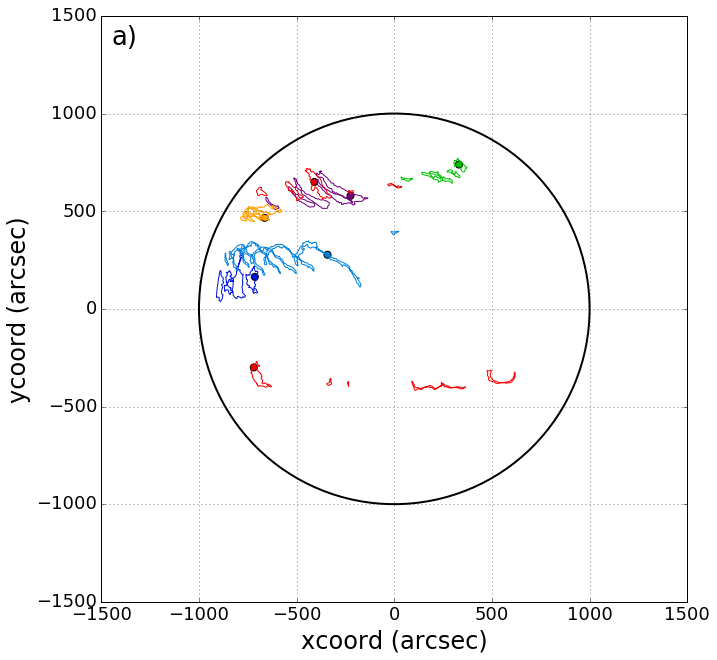

In [101]:
SetupSunPlot()
fig1 = plt.gcf()

i=0
contained = []
for poly in good_polygons:
    contained.append(poly[0])
contained =  np.unique(contained)

colorscale = get_colorscale(contained)

fig=plt.scatter(longitude,latitude,c= colorscale,s=50)
plt.text(-1450,1350,'a)',fontsize=26)

plot_polys(good_polygons)

plt.show()
fig1.savefig('filament_tracks_contained_eruptions.eps',format='eps')
fig1.savefig('filament_tracks_contained_eruptions.pdf',format='pdf')

In [102]:
client = hek.HEKClient()
h2v = hek2vso.H2VClient()
tstart = '2012/01/21 06:00:00'
tend = '2012/01/21 08:00:00'
event_type = 'FE'
eruptions = client.query(hek.attrs.Time(tstart,tend),hek.attrs.EventType(event_type))
#vso_records = h2v.translate_and_query(eruptions[10])
print len(eruptions)

1


In [103]:
longitude = [elem["hpc_x"]for elem in eruptions]
latitude = [elem["hpc_y"] for elem in eruptions]
box = [elem["hpc_bbox"] for elem in eruptions]   

2012-01-12 08:24:05
2012-01-12 18:29:14
2012-01-13 18:23:37
2012-01-14 08:16:28
2012-01-15 09:44:48
2012-01-16 08:25:38
2012-01-17 07:51:41
2012-01-17 18:08:23
2012-01-18 08:13:36
2012-01-18 18:23:34
2012-01-19 10:32:20
2012-01-19 17:47:27
2012-01-20 07:57:02
2012-01-20 18:52:42
2012-01-21 08:23:31


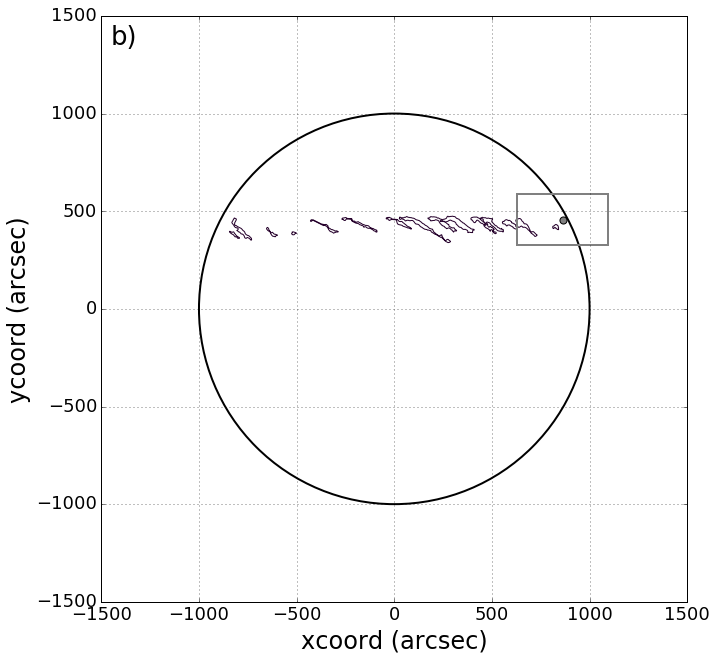

In [131]:
SetupSunPlot()
fig1 = plt.gcf()

this_track = 110
#set up color table
scalarMap = SetupColorMap('nipy_spectral',0,track_no[-1])
#need an iterator
i=0
#loop through polygons
FI_track_polys = fi_tracked['HPC_BB_Poly']
for FI_track_no in track_no:
    if track_no[i] == this_track:
    #make filaments from the same track the same color
        colorVal = scalarMap.to_rgba(track_no[i])
        #points = [val.split(' ') for val in poly_points]     
        PlotPolygon(FI_track_polys[i],colorVal)
        print date[i]
    i=i+1 

fig=plt.scatter(longitude,latitude,c= 'grey',s=50)    

#scaleR= m.to_rgba(box[1])
plot_box=plt.Polygon(loads(box[0]).exterior,color='grey',linewidth=2,fill=None)
fig1.gca().add_artist(plot_box)    

plt.text(-1450,1350,'b)',fontsize=26)

fig1.savefig('filament_tracks_contained_box.eps',format='eps')
fig1.savefig('filament_tracks_contained_box.pdf',format='pdf')

In [157]:
client = hek.HEKClient()
h2v = hek2vso.H2VClient()
tstart = '2012/01/14 00:00:05'
tend = '2012/01/14 01:00:00'
event_type = 'FE'
eruptions = client.query(hek.attrs.Time(tstart,tend),hek.attrs.EventType(event_type))
#vso_records = h2v.translate_and_query(eruptions[10])
latitude = [elem["hpc_y"] for elem in eruptions]
longitude = [elem["hpc_x"] for elem in eruptions]
er_date = [elem["event_starttime"] for elem in eruptions]
print latitude
print longitude
print er_date

[406]
[624]
[u'2012-01-14T00:00:04']


14


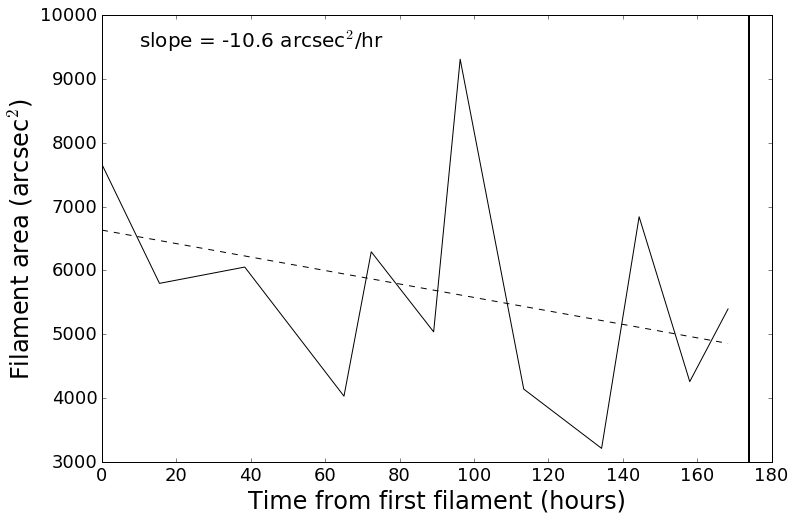

In [185]:
polys_series = fi_tracked['HPC_BB_Poly']
polys = polys_series.values

this_track=57
time_delta = []
tot_area = []
poly_date = []
i=0

for FI_track_no in track_no:
    if track_no[i] == this_track:
        good_poly = polys[i]
        poly = loads(good_poly) 
        tot_area.append(poly.area)
        poly_date.append(date[i])
    i=i+1

time = [pd.to_datetime(elem) for elem in poly_date]
er_time = pd.to_datetime(er_date)
t0 = time[0]

tot_area_trunc = []
print len(time)
for i in range(len(time)):
    t1 = time[i]
    #use times before the eruption
    if t1 < er_time:
        time_delta.append(timedelta.total_seconds(t1 - t0)/3600)  
        tot_area_trunc.append(tot_area[i])

er_time_hours = timedelta.total_seconds(er_time[0]-t0)/3600

plt.figure(figsize=(12,8))
plt.tick_params(axis='both', which='major', labelsize=18)       
plt.xlabel('Time from first filament (hours)', fontsize=24)
plt.ylabel('Filament area (arcsec$^2$)',fontsize=24)      


plt.plot(time_delta,tot_area_trunc,c='0',linewidth=1)

plt.axvline(x=er_time_hours,color='0',linewidth=2)

area_slopes = []
fit = np.polyfit(time_delta, tot_area_trunc,1)
area_slopes = area_slopes + [fit]*len(tot_area_trunc) 

m = fit[0]
b = fit[1]
line = [m*each+b for each in time_delta] #Calculate the line points (y =mx+b)
plt.text(10,9500,'slope = %.3g arcsec$^2$/hr'%m,fontsize=20)
plt.plot(time_delta, line,c='0',linewidth=1,linestyle='--')


plt.savefig('area_slope_track.eps',format='eps')
plt.savefig('area_slope_track.pdf',format='pdf')
plt.show()